### Data Analysis and Machine Learning
Analysis and ML. 

# Logistic regression

This includes descriptive stats, visualizations, and logistic regression (using statsmodels. 

If some images have multiple hands, the code handles varying columns via NaN dropping/imputation. 

For classification, using all RGB features to predict Label (0: unhealthy, 1: healthy).

Added code to get the model performance data and add to model_perfomance.csv to help assess models.


=== Analysis for Radius 1 ===
Rows after imputing with mean the NaN: 127 (imputed 0)

Descriptive Statistics:
       thumb_segment_0_0_R  thumb_segment_0_0_G  thumb_segment_0_0_B  \
count           127.000000           127.000000           127.000000   
mean            216.727406           155.790968           142.485517   
std              30.179324            31.110781            30.257138   
min             110.777778            61.777778            47.777778   
25%             204.500000           138.666667           125.055556   
50%             223.777778           158.333333           145.666667   
75%             238.000000           176.000000           161.500000   
max             254.777778           217.000000           202.888889   

       thumb_segment_1_0_R  thumb_segment_1_0_G  thumb_segment_1_0_B  \
count           127.000000           127.000000           127.000000   
mean            217.979003           168.853893           148.636920   
std              25.2506

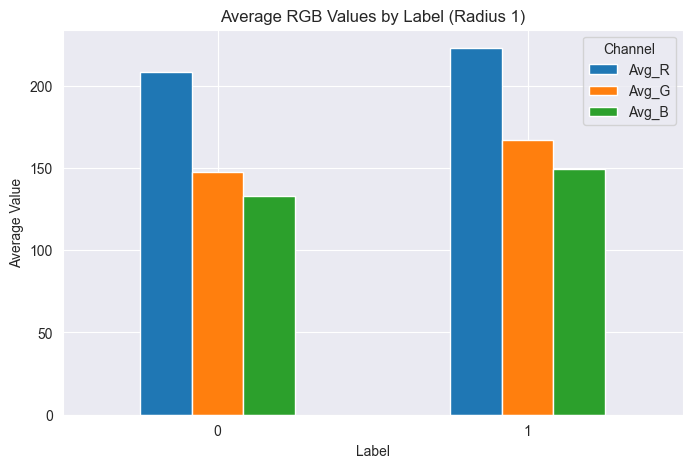


Logistic Regression Model (with L2 Regularization):
Test Accuracy: 0.88
5-Fold CV Accuracy: 0.68 (+/- 0.12)

Confusion Matrix:
                      Predicted Unhealthy (0)  Predicted Healthy (1)
Actual Unhealthy (0)                       13                      2
Actual Healthy (1)                          1                     10
Updated model_comparison.csv with Logistic Regression for Radius 1

=== Analysis for Radius 3 ===
Rows after imputing with mean the NaN: 127 (imputed 0)

Descriptive Statistics:
       thumb_segment_0_0_R  thumb_segment_0_0_G  thumb_segment_0_0_B  \
count           127.000000           127.000000           127.000000   
mean            216.073599           155.253505           141.901881   
std              29.871119            30.721309            29.791656   
min             110.918367            61.857143            48.244898   
25%             203.714286           138.367347           125.704082   
50%             224.448980           158.448980        

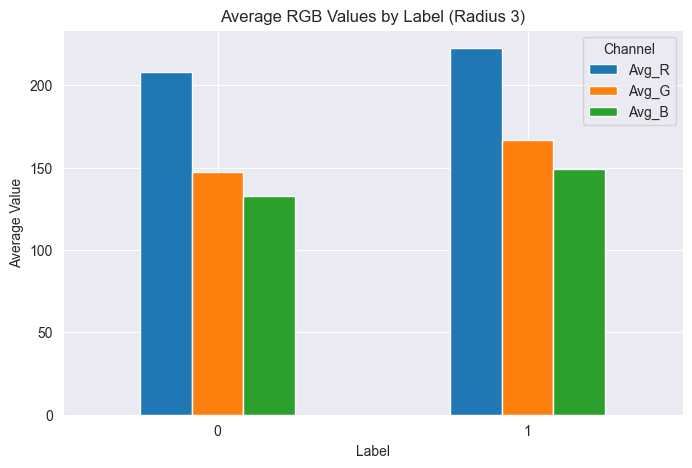


Logistic Regression Model (with L2 Regularization):
Test Accuracy: 0.81
5-Fold CV Accuracy: 0.69 (+/- 0.11)

Confusion Matrix:
                      Predicted Unhealthy (0)  Predicted Healthy (1)
Actual Unhealthy (0)                       11                      4
Actual Healthy (1)                          1                     10
Updated model_comparison.csv with Logistic Regression for Radius 3

=== Analysis for Radius 5 ===
Rows after imputing with mean the NaN: 127 (imputed 0)

Descriptive Statistics:
       thumb_segment_0_0_R  thumb_segment_0_0_G  thumb_segment_0_0_B  \
count           127.000000           127.000000           127.000000   
mean            215.553524           154.951938           141.520694   
std              29.380936            30.055798            29.038607   
min             111.438017            62.429752            49.132231   
25%             203.607438           138.760331           126.293388   
50%             223.710744           158.528926        

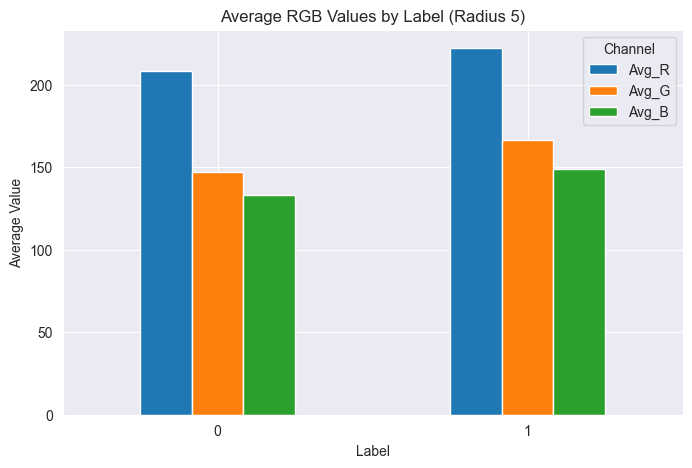


Logistic Regression Model (with L2 Regularization):
Test Accuracy: 0.81
5-Fold CV Accuracy: 0.71 (+/- 0.11)

Confusion Matrix:
                      Predicted Unhealthy (0)  Predicted Healthy (1)
Actual Unhealthy (0)                       12                      3
Actual Healthy (1)                          2                      9
Updated model_comparison.csv with Logistic Regression for Radius 5


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import os

# Function to update model_comparison.csv
def update_model_comparison(model_name, radius, test_acc, cv_mean, cv_std):
    data = {
        'Model': [model_name],
        'Radius': [radius],
        'Test_Accuracy': [test_acc],
        'CV_Accuracy': [cv_mean],
        'CV_Std': [cv_std]
    }
    new_df = pd.DataFrame(data)
    
    file_path = '../data/model_comparison.csv'
    if os.path.exists(file_path):
        existing_df = pd.read_csv(file_path)
        updated_df = pd.concat([existing_df, new_df], ignore_index=True)
    else:
        updated_df = new_df
    updated_df.to_csv(file_path, index=False)
    print(f"Updated model_comparison.csv with {model_name} for Radius {radius}")

# Analyze each radius dataset
for radius in [1, 3, 5]:
    print(f"\n=== Analysis for Radius {radius} ===")
    file_path = f'../data/hand_color_data_midpoints_radius_{radius}.csv'
    df = pd.read_csv(file_path)
    
    # Impute NaNs with mean
    original_rows = df.shape[0]
    df.fillna(df.mean(numeric_only=True), inplace=True)
    print(f"Rows after imputing with mean the NaN: {df.shape[0]} (imputed {original_rows - df.shape[0]})")
    
    # Descriptive statistics
    print("\nDescriptive Statistics:")
    print(df.describe())
    
    # Grouped means by Label
    print("\nGrouped Means by Label:")
    print(df.groupby('Label').mean(numeric_only=True))
    
    # Visualization: Average RGB per label
    df['Avg_R'] = df.filter(regex='_R$').mean(axis=1)
    df['Avg_G'] = df.filter(regex='_G$').mean(axis=1)
    df['Avg_B'] = df.filter(regex='_B$').mean(axis=1)
    avg_rgb = df.groupby('Label')[['Avg_R', 'Avg_G', 'Avg_B']].mean()
    avg_rgb.plot(kind='bar', figsize=(8, 5))
    plt.title(f'Average RGB Values by Label (Radius {radius})')
    plt.ylabel('Average Value')
    plt.xticks(rotation=0)
    plt.legend(title='Channel')
    plt.show()
    
    # Machine Learning: Logistic Regression with Regularization
    print("\nLogistic Regression Model (with L2 Regularization):")
    X = df.drop(['Source', 'Label', 'Avg_R', 'Avg_G', 'Avg_B'], axis=1, errors='ignore')
    y = df['Label']
    
    # Scale features to prevent overflow
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Logistic Regression with L2 regularization
    model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
    model.fit(X_train, y_train)
    
    # Predictions and accuracy
    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {test_acc:.2f}")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_scaled, y, cv=5)
    cv_mean = np.mean(cv_scores)
    cv_std = np.std(cv_scores)
    print(f"5-Fold CV Accuracy: {cv_mean:.2f} (+/- {cv_std:.2f})")
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(pd.DataFrame(conf_matrix, index=['Actual Unhealthy (0)', 'Actual Healthy (1)'], columns=['Predicted Unhealthy (0)', 'Predicted Healthy (1)']))
    
    # Update comparison CSV
    update_model_comparison('Logistic Regression', radius, test_acc, cv_mean, cv_std)

The errors  (RuntimeWarning for overflow in exp and divide by zero in log, plus PerfectSeparationWarning in one case) are common in logistic regression when there's perfect or near-perfect separation in the data. 

This means the features can (almost) perfectly distinguish between classes (Label 0 vs. 1) in the training set, causing the model's coefficients to become extremely large (leading to overflow/div by zero during computation). 

With dataset size (127 rows) and high number of features (~84 RGB values per segment/hand), this is exacerbated by multicollinearity (e.g., R, G, B channels across segments are highly correlated) and potential overfitting.


Additionally, the "Singular matrix" error indicates the model can't invert the Hessian matrix during fitting, again due to separation or collinearity.


No data was lost to NaNs (output shows "imputed 0", meaning no rows needed imputation or dropping after using fillna)

Key Insights from the Analysis

Dataset Overview: Each radius has 127 rows (images) and 86 columns (RGB per finger segment per hand, plus Source and Label). Some columns have NaNs (e.g., for second hand in single-hand images), but imputation handled them without row loss.

Descriptive Stats: RGB values range ~50-255, with means around 140-220 (typical for skin tones). Std devs (~20-30) show moderate variation.

Grouped Means by Label: Consistent pattern across all radii—healthy hands (Label 1) have higher mean RGB values than unhealthy (Label 0) in nearly every segment and channel. 

Differences are ~15-30 points on the 0-255 scale, which is meaningful (e.g., healthier hands appear brighter/more saturated, possibly less pale or jaundiced).

Example for Radius 1 (similar for others):

Segment Example,Channel,Unhealthy (0),Healthy (1),Difference

Thumb Seg 0,    R,  205.5,  232.4,  +26.9

Thumb Seg 0,    G,  142.2,  174.8,  +32.6

Thumb Seg 0,    B,  131.5,  157.8,  +26.3

Index Seg 0,    R,  204.5,  231.3,  +26.8


This holds for most fingers/segments, with G channel often showing the largest gap (~30-35 points).

Radius 5 shows slightly smaller gaps (smoothing from larger sampling area), but pattern persists.


Implication: Color sampling at midpoints effectively captures health indicators (e.g., better circulation/vitality in healthy hands leads to richer colors).


Visualizations: The bar plots (one per radius) show taller bars for Label 1 across Avg_R, Avg_G, Avg_B, confirming the trend. If differences are statistically significant (e.g., via t-tests), color alone could be a strong predictor.

***********************************************************************


Radius Comparison:

Radius 1: Sharpest differences (less averaging), but potentially noisier.

Radius 3: Balanced; means similar to Radius 1.

Radius 5: Slightly muted differences (more pixels averaged, including edges), but still clear separation.

Recommendation: Radius 3 for best trade-off (less boundary issues than 5, more robust than 1).

### Overall, the data supports color-based prediction: Healthy hands are brighter across RGB. With ~70 unhealthy and ~57 healthy samples, it's feasible but small—  reasonable to expect 80-95% accuracy if separation holds.